In [306]:
# Training Neural Network from Scratch
import torch
import numpy as np
import matplotlib.pyplot as plt

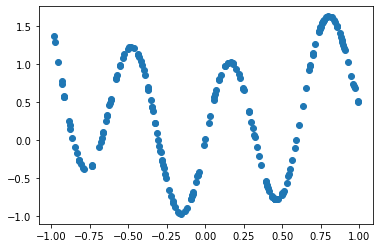

In [307]:
# Generate data for training
iter = 200

# Output
y = np.zeros(iter)

#Inputs
x1 = 2*np.random.rand(iter) - 1

def f(x1):
    return x1**2 + 1*np.sin(10*x1)

for i in range(0,iter):
    y[i] = f(x1[i])       # y is the input for calculation of next state

plt.scatter(x1, y)
x1 = torch.from_numpy(x1)
y = torch.from_numpy(y)

In [308]:
# Initializing the weights and other parametrs of the NN
n0 = 1            # No of inputs/input neurons
n1 = 40           # no. of Neurons in the first layer
n2 = 40           # No. of Neurons in the second layer
n3 = 1            # No. of Outputs

W1 = 2*torch.rand((n1, n0))-1   # weights between hidden and input layer
W2 = 2*torch.rand((n2, n1))-1  # weights between hidden and output layer
W3 = 2*torch.rand((n3, n2))-1    # weights between hidden and output layer

b1 = 2*torch.rand((n1,1))-1
b2 = 2*torch.rand((n2,1))-1
b3 = 2*torch.rand((n3,1))-1

W1.requires_grad_(True)
W2.requires_grad_(True)
W3.requires_grad_(True)
b1.requires_grad_(True)
b2.requires_grad_(True)
b3.requires_grad_(True)


x = x1[1]
# Forward evaluation of Neural Network
# Layer 1
h1 = W1*x + b1
v1 = torch.nn.functional.relu(h1)
#Layer 2
h2 = torch.matmul(W2,v1) + b2
v2 = torch.nn.functional.relu(h2)
# Layer 3
H = torch.matmul(W3,v2) + b3

loss = (H-y[1])**2

loss.backward()

W1.grad.data.zero_()
W2.grad.data.zero_()
W3.grad.data.zero_()
b1.grad.data.zero_()
b2.grad.data.zero_()
b3.grad.data.zero_()

h1 = W1*x + b1
v1 = torch.nn.functional.relu(h1)
#Layer 2
h2 = torch.matmul(W2,v1) + b2
v2 = torch.nn.functional.relu(h2)
# Layer 3
H = torch.matmul(W3,v2) + b3

loss = (H-y[2])**2

loss.backward()

W1.grad

tensor([[ 0.2198],
        [ 0.0000],
        [ 0.0000],
        [-0.0308],
        [-0.1652],
        [ 0.0000],
        [ 0.0000],
        [-0.5378],
        [-0.4730],
        [ 0.0000],
        [ 0.4755],
        [ 0.0000],
        [ 0.0000],
        [-0.3054],
        [-0.5001],
        [ 1.0936],
        [ 0.0000],
        [-0.2091],
        [-0.0855],
        [-0.7397],
        [ 0.0000],
        [ 0.1620],
        [ 0.0000],
        [-0.7399],
        [ 0.0000],
        [ 0.6000],
        [ 0.0000],
        [ 0.4269],
        [ 0.0000],
        [-0.7910],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0673],
        [ 0.0408],
        [-0.7271],
        [ 0.2350],
        [ 0.0000],
        [ 0.0000]])

In [309]:
# Training the network
lr = 0.001      # learning rate
epoch = 1000    # no. of epochsen
p = 1          # p is the index of each epoch


while ( p <= epoch ):
    for j in range(0,iter):   # j is the index of each pattern
        x = x1[j]
        # Forward evaluation of Neural Network
        # Layer 1
        h1 = W1*x + b1
        v1 = torch.nn.functional.relu(h1)
        #Layer 2
        h2 = torch.matmul(W2,v1) + b2
        v2 = torch.nn.functional.relu(h2)
        # Layer 3
        H = torch.matmul(W3,v2) + b3
       
        loss = (H-y[j])**2
        
        loss.backward()
        
    
        # Updating gradient functions
        W1.data -= lr*W1.grad.data
        W2.data -= lr*W2.grad.data
        W3.data -= lr*W3.grad.data
        b1.data -= lr*b1.grad.data
        b2.data -= lr*b2.grad.data
        b3.data -= lr*b3.grad.data
        
        W1.grad.data.zero_()
        W2.grad.data.zero_()
        W3.grad.data.zero_()
        b1.grad.data.zero_()
        b2.grad.data.zero_()
        b3.grad.data.zero_()

    p=p+1

    

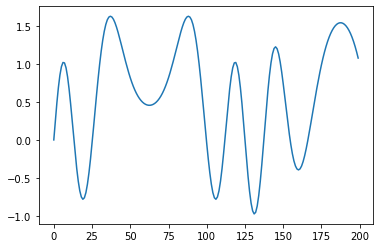

In [310]:
# plot actual test data

iter_t = 200                          # No. of test data set
y = np.zeros(iter_t)
u = np.zeros(iter_t)

for i in range(0,iter_t):
    if i <= 500:
        u[i] = np.sin( 2*np.pi*i/250)                     # Test Input Data
    else:
        u[i] = 0.8*np.sin(2*np.pi*i/250) + 0.2*np.sin(2*np.pi*i/25)

    y[i] = f(u[i])    # y is the input for calculation of next state

x = np.zeros(iter_t)
for i in range(0,iter_t):                             # Storing inputs in x for convinience
    x[i] = u[i]

plt.plot(y[0:iter_t])

tensor([[ 0.8289],
        [-0.5921],
        [-0.1947],
        [-0.0946],
        [ 0.4455],
        [ 0.1866],
        [-0.6843],
        [-0.4784],
        [ 0.5674],
        [-0.5370],
        [-0.1583],
        [-0.8873],
        [-0.8355],
        [ 1.1998],
        [ 0.5872],
        [ 0.9890],
        [-0.7921],
        [ 0.4214],
        [ 0.9476],
        [ 1.0756],
        [-0.3352],
        [-0.3979],
        [-0.4871],
        [ 0.7426],
        [-0.7748],
        [ 0.4742],
        [-0.4407],
        [ 0.6523],
        [-0.4287],
        [-0.3763],
        [-0.9797],
        [ 0.4127],
        [-0.7231],
        [-0.7842],
        [-0.2475],
        [ 0.2179],
        [ 0.1852],
        [ 0.0849],
        [ 0.2181],
        [-0.9798]], requires_grad=True)


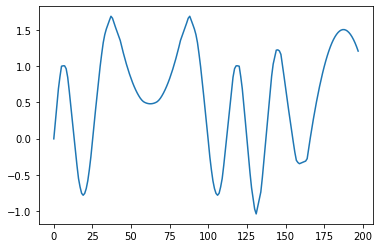

In [311]:
# Plot using Neural Network
x1 = torch.from_numpy(x)
y_act = torch.from_numpy(y)

for j in range(0,iter_t-2):
    h1 = W1*x1[j] + b1
    v1 = torch.nn.functional.relu(h1)
    #Layer 2
    h2 = torch.matmul(W2,v1) + b2
    v2 = torch.nn.functional.relu(h2)
    # Layer 3
    H = torch.matmul(W3,v2) + b3
    #Storing Values
    y_act[j] = H
    
print(b1)
plt.plot(y_act.detach().numpy()[:-2])